In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Getting the MNSIT Fashion
data = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
X_train = data.iloc[:, 1:].values.astype('float32')
y_train = data.iloc[:, 0].values.astype('int32')
data_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)
X_test = data_test.iloc[:,1:].values.astype('float32')
print(X_train)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


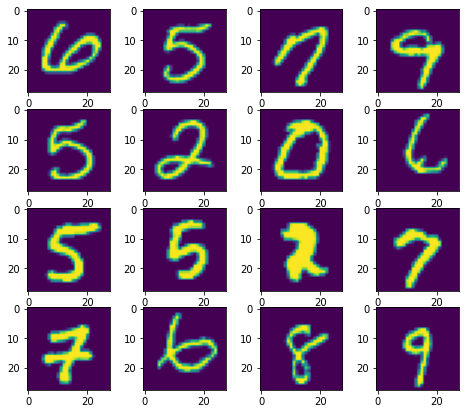

In [ ]:
def show_img(x):
    size_img = 28
    plt.figure(figsize=(8,7))
    num_images = 16
    n_samples = x.shape[0]
    x = x.reshape(n_samples, size_img, size_img)
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i])
    plt.show()
    
show_img(X_train)


In [ ]:
# Data Preprocessing
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:

# Adding the first hidden layer and input layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_shape = (784,)))

# Adding the second hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the ouput layer
classifier.add(Dense(units = 10, activation = 'softmax'))




In [ ]:
# Compiling  the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, validation_data=(X_val,y_val), epochs = 100)


Epoch 1/100
563/563 [==============================] - 2s 4ms/step - loss: 0.3488 - accuracy: 0.9008 - val_loss: 0.2286 - val_accuracy: 0.9300
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 0.1345 - accuracy: 0.9581 - val_loss: 0.1703 - val_accuracy: 0.9435
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.9723 - val_loss: 0.1166 - val_accuracy: 0.9655
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.1433 - val_accuracy: 0.9580
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9843 - val_loss: 0.1412 - val_accuracy: 0.9640
Epoch 6/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.1535 - val_accuracy: 0.9620
Epoch 7/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.1506 - val_accuracy: 0.9625

In [ ]:
# Evaluating on Validation Set
classifier.evaluate(X_val, y_val)

63/63 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.9745


[0.32448357343673706, 0.9745000004768372]

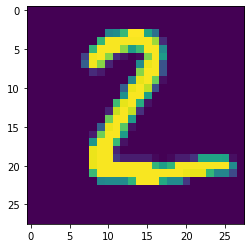

In [ ]:
# Testing the model
image = X_test[1].reshape(28,28)
plt.imshow(image)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred_classes[1])

2
